# Part 3E: Compare Frameworks (Keras vs TF vs PyTorch vs scikit‑learn)

_Author: Suyog Garg_, _Dated: 2025/11/18_



This notebook aggregates the **metrics JSON** written by the four framework notebooks
and produces a comparison table and a couple of simple plots (accuracy and train time).


Found: ['artifacts/keras_metrics.json', 'artifacts/pytorch_metrics.json', 'artifacts/sklearn_metrics.json', 'artifacts/tfcore_metrics.json']


,framework,test_accuracy,train_time_sec,params,epochs,effective_loc,device
0,keras,0.991600,125.715037,1199882,5,11,"[PhysicalDevice(name='/physical_device:CPU:0',..."
1,pytorch,0.989300,53.955756,1199882,5,24,mps
2,scikit-learn+scikeras,0.989357,729.097018,1199882,5,13,"[PhysicalDevice(name='/physical_device:CPU:0',..."
3,tensorflow,0.990400,143.301088,1199882,5,24,"[PhysicalDevice(name='/physical_device:CPU:0',..."


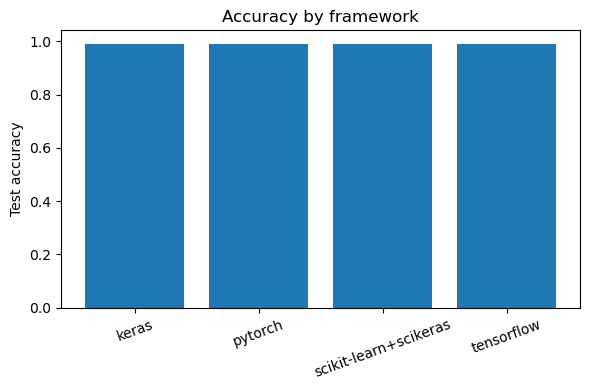

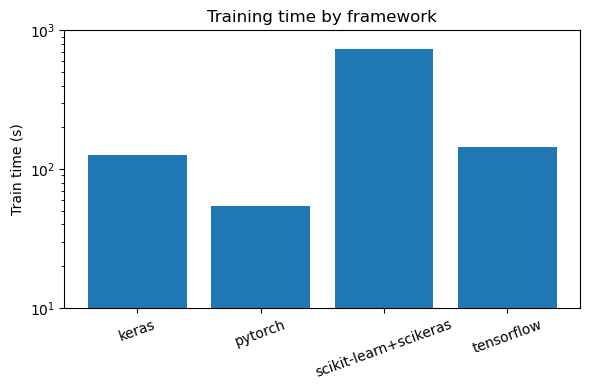

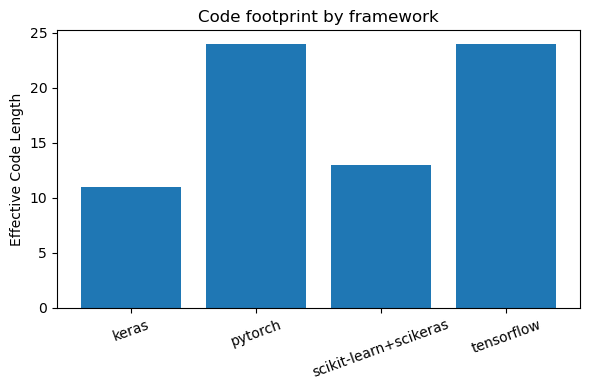

In [12]:

import json, glob, os, pandas as pd
import matplotlib.pyplot as plt

paths = sorted(glob.glob("artifacts/*_metrics.json"))
if not paths:
    print("No metrics found. Run the framework notebooks first (they write artifacts/*_metrics.json).")
else:
    print("Found:", paths)

rows = []
for p in paths:
    with open(p, "r") as f:
        rows.append(json.load(f))
df = pd.DataFrame(rows)
display(df[["framework","test_accuracy","train_time_sec","params","epochs","effective_loc","device"]])

# Plot accuracy
plt.figure(figsize=(6,4))
plt.bar(df["framework"], df["test_accuracy"])
plt.ylabel("Test accuracy"); plt.title("Accuracy by framework"); plt.xticks(rotation=20); plt.tight_layout()
plt.savefig("artifacts/compare_accuracy.png", dpi=150); plt.show()

# Plot training time
plt.figure(figsize=(6,4))
plt.bar(df["framework"], df["train_time_sec"])
plt.yscale("log")
plt.ylim(1e1,1e3)
# plt.grid()
plt.ylabel("Train time (s)"); plt.title("Training time by framework"); plt.xticks(rotation=20); plt.tight_layout()
plt.savefig("artifacts/compare_train_time.png", dpi=150); plt.show()

# Plot effective LOC (rough proxy for code length)
if "effective_loc" in df:
    plt.figure(figsize=(6,4))
    plt.bar(df["framework"], df["effective_loc"])
    plt.ylabel("Effective Code Length"); plt.title("Code footprint by framework"); plt.xticks(rotation=20); plt.tight_layout()
    plt.savefig("artifacts/compare_loc.png", dpi=150); plt.show()
